# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [245]:
# Import Libraries
# Import Libraries
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [246]:
# Load Dataset
df=pd.read_csv('SeoulBikeData.csv',encoding='unicode_escape')

### Dataset First View

In [247]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [248]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

### Dataset Information

In [249]:
# Dataset Info
df.info()
# Date col dtype is object ,convverting it to Datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [250]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [251]:
# Missing Values/Null Values Count
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [252]:
# Visualizing the missing values

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [253]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [254]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [255]:
# Check Unique Values for each variable.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [256]:
# Handpicking categorical col
# can be obtained from ~df.describe()
cat_col=['Seasons','Holiday', 'Functioning Day']
for col in cat_col:
    print(df[col].unique())
    print('-'*50)

['Winter' 'Spring' 'Summer' 'Autumn']
--------------------------------------------------
['No Holiday' 'Holiday']
--------------------------------------------------
['Yes' 'No']
--------------------------------------------------


## 3. ***Data Wrangling***

### Data Wrangling Code

In [257]:
# Write your code to make your dataset analysis ready.


# Date col dtype is object ,convverting it to Datetime
from datetime import datetime

df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')

df['month']=df['Date'].dt.month
df['day_weekend']=df['Date'].dt.day_name()


In [258]:
# Dropping Date col as month is made unit of analysis
df.drop(['Date'],axis=1,inplace=True)

In [259]:
# Separating numerical dats & categorical data
numerical_data=list(set(df.describe().columns)-{'Hour','month'})
categorical_data=list(set(df.columns)-set(numerical_data))

# Data is +vely skewed may need to transform it further

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Density'>

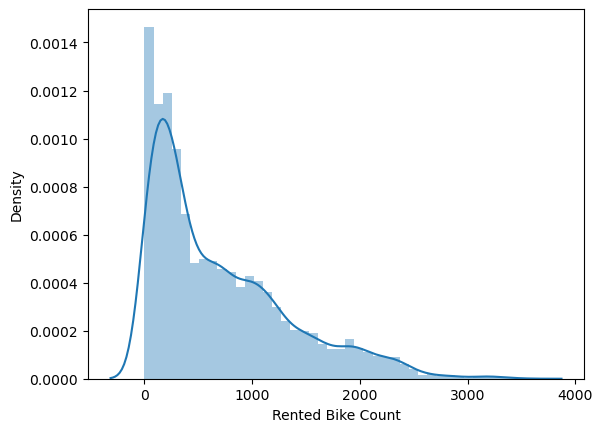

In [260]:
# Chart - 1 visualization code
sns.distplot(df['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [261]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [262]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [263]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [264]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [265]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [266]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [267]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [268]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [269]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [270]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [271]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [272]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [273]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'day_weekend'],
      dtype='object')

<AxesSubplot:>

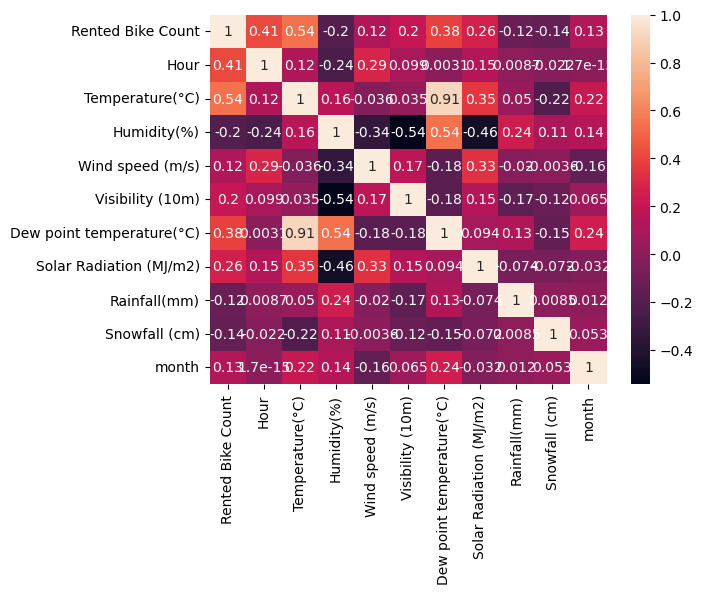

In [274]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr(),annot=True)

# Following features have strong correlation with the 'Rented Bike Count'
#  'Hour', 'Temperature(°C)','Dew point temperature(°C)',
      

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [275]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [276]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [277]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [278]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [279]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
day_weekend                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?


No missing values

### 2. Handling Outliers

AxesSubplot(0.125,0.653529;0.227941x0.226471)
AxesSubplot(0.398529,0.653529;0.227941x0.226471)
AxesSubplot(0.672059,0.653529;0.227941x0.226471)
AxesSubplot(0.125,0.381765;0.227941x0.226471)
AxesSubplot(0.398529,0.381765;0.227941x0.226471)
AxesSubplot(0.672059,0.381765;0.227941x0.226471)
AxesSubplot(0.125,0.11;0.227941x0.226471)
AxesSubplot(0.398529,0.11;0.227941x0.226471)


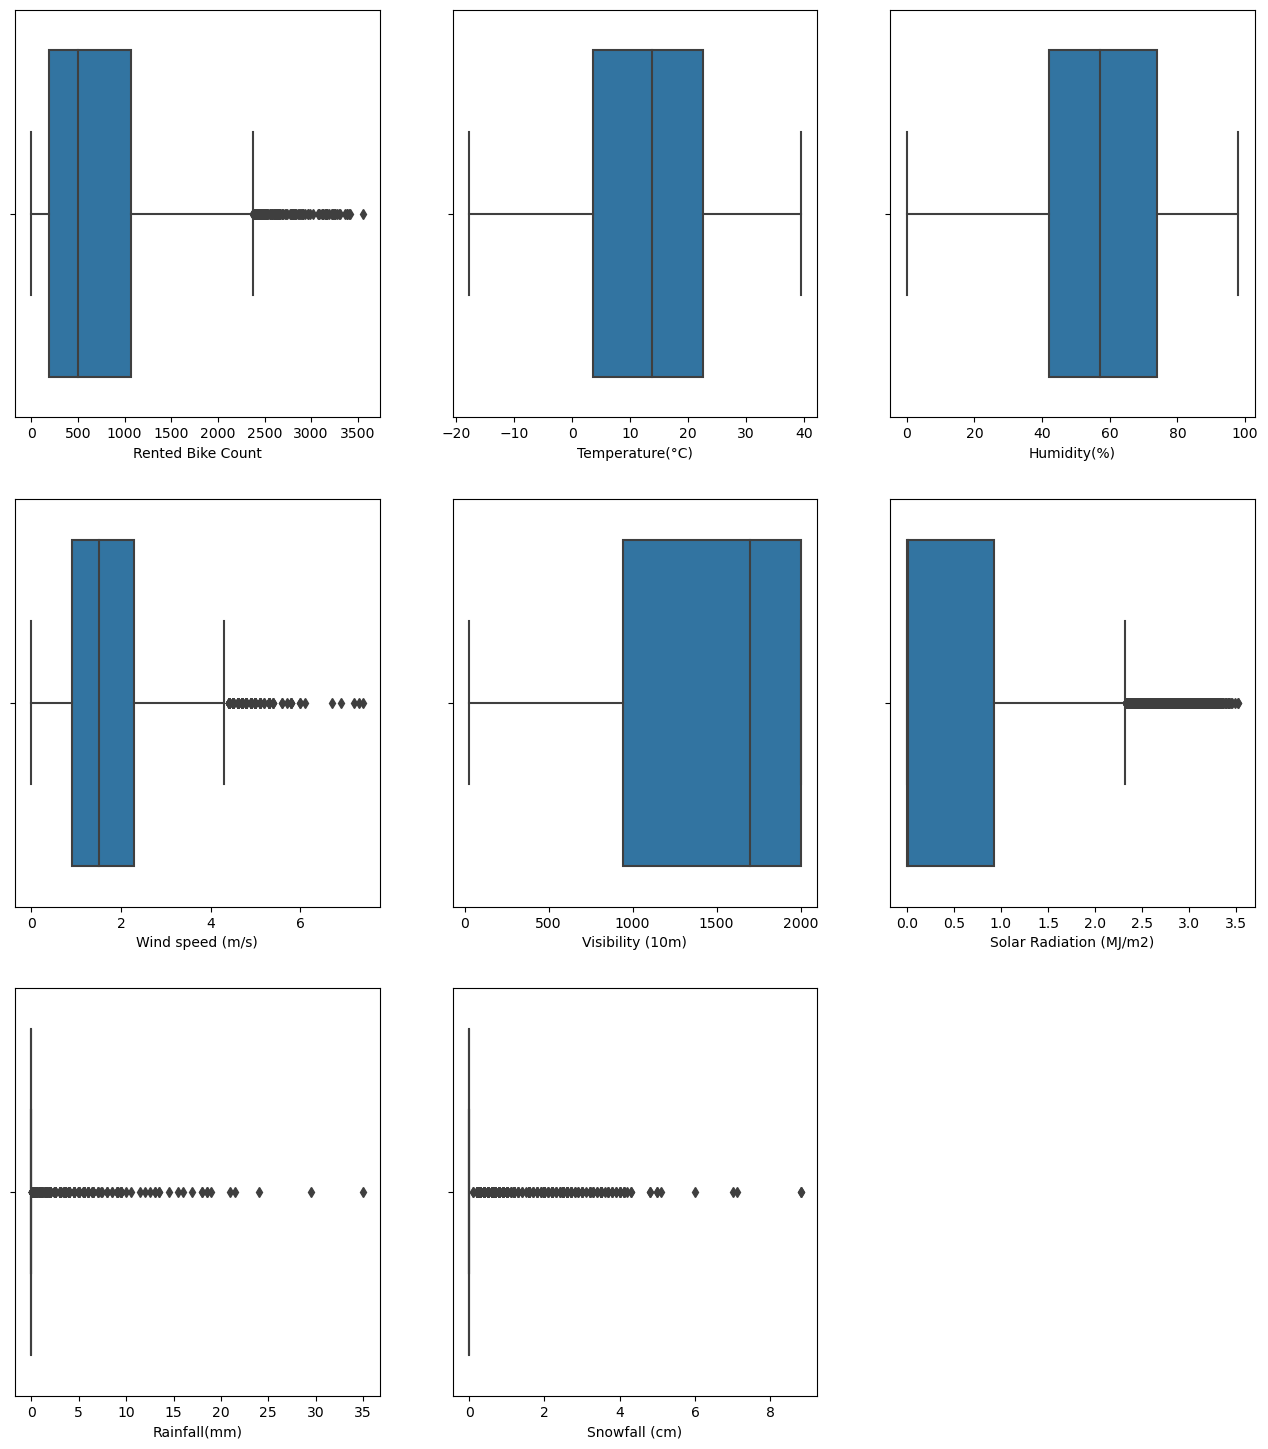

In [280]:
# Handling Outliers & Outlier treatments
possible_outliers=['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

plt.figure(figsize=(16,18))
n=1
for col in possible_outliers:
    plt.subplot(3,3,n)
    print(sns.boxplot(data=df,x=col))
    n+=1
    
plt.show()

In [281]:
# Removing outliers of 'Rented Bike Count' based on Inter-quantile range
q1=df['Rented Bike Count'].quantile(0.25)
q3=df['Rented Bike Count'].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
df=df[(df['Rented Bike Count']>=lb)&(df['Rented Bike Count']<=ub)]



##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [282]:
# Expand Contraction

#### 2. Lower Casing

In [283]:
# Lower Casing

#### 3. Removing Punctuations

In [284]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [285]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [286]:
# Remove Stopwords

In [287]:
# Remove White spaces

#### 6. Rephrase Text

In [288]:
# Rephrase Text

#### 7. Tokenization

In [289]:
# Tokenization

#### 8. Text Normalization

In [290]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [291]:
# POS Taging

#### 10. Text Vectorization

In [292]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [293]:
# Manipulate Features to minimize feature correlation and create new features

#  To avoid multicollinearity ,calculating VIF .
# Eliminating those independent features which have VIF greater than 5

# Multicollinearity can lead to reduced interpretability, and decreased predictive power.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
#     Creating Empty DF
    vif=pd.DataFrame()
    
    # Calculate VIF for each variable
    vif['variables']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif

#### 2. Feature Selection

In [294]:
# Select your features wisely to avoid overfitting


# Calculating vif for all independent variables except ['Rented Bike Count'], as it is a dependent variable
calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

# Keeping Temperature(°C) & eliminating 'Dew point temperature(°C)' as it has VIF greater than 5


,variables,VIF
0,Hour,4.316194
1,Temperature(°C),33.860600
2,Humidity(%),6.786301
3,Wind speed (m/s),4.831100
4,Visibility (10m),9.245407
5,Dew point temperature(°C),17.410460
6,Solar Radiation (MJ/m2),2.920686
7,Rainfall(mm),1.082657
8,Snowfall (cm),1.133084
9,month,5.036458


In [295]:
calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count',\
                                                                'Dew point temperature(°C)']]])

,variables,VIF
0,Hour,3.863267
1,Temperature(°C),3.264437
2,Humidity(%),6.069091
3,Wind speed (m/s),4.606814
4,Visibility (10m),5.263431
5,Solar Radiation (MJ/m2),2.277810
6,Rainfall(mm),1.080431
7,Snowfall (cm),1.132083
8,month,4.947531


In [296]:
# Removing 'Wind speed (m/s)','Humidity(%)','Visibility (10m)' as VIF of these is >5

calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count',\
                                                                'Dew point temperature(°C)','Wind speed (m/s)','Humidity(%)','Visibility (10m)']]])

,variables,VIF
0,Hour,2.633608
1,Temperature(°C),2.712994
2,Solar Radiation (MJ/m2),1.670963
3,Rainfall(mm),1.030607
4,Snowfall (cm),1.087750
5,month,2.989473


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

In [297]:
labels=['Night','Morning','Afternoon','Evening',]
bins=[-1,5,11,16,23]
df['Time_classification']=pd.cut(df['Hour'],bins=bins,labels=labels)

In [298]:
df.drop(['Hour','Dew point temperature(°C)','Wind speed (m/s)','Humidity(%)','Visibility (10m)'],axis=1,inplace=True)


In [299]:
# Encode your categorical columns
df['Holiday']=df['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)
df['Functioning Day']=df['Functioning Day'].apply(lambda x: 1 if x=='Yes' else 0)
df['day_weekend']=df['day_weekend'].apply(lambda x: 1 if x==['Sunday','Saturday'] else 0)

df=pd.get_dummies(df,columns=['Seasons','Time_classification','month'],drop_first=True)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [300]:
# Transform Your data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8602 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rented Bike Count              8602 non-null   int64  
 1   Temperature(°C)                8602 non-null   float64
 2   Solar Radiation (MJ/m2)        8602 non-null   float64
 3   Rainfall(mm)                   8602 non-null   float64
 4   Snowfall (cm)                  8602 non-null   float64
 5   Holiday                        8602 non-null   int64  
 6   Functioning Day                8602 non-null   int64  
 7   day_weekend                    8602 non-null   int64  
 8   Seasons_Spring                 8602 non-null   uint8  
 9   Seasons_Summer                 8602 non-null   uint8  
 10  Seasons_Winter                 8602 non-null   uint8  
 11  Time_classification_Morning    8602 non-null   uint8  
 12  Time_classification_Afternoon  8602 non-null   u

### 6. Data Scaling

In [301]:
# Scaling your data


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [302]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [303]:
X=df.iloc[:,1:]
y=df.iloc[:,0]


In [304]:
# Using sqrt to normalize y
y=np.sqrt(y)


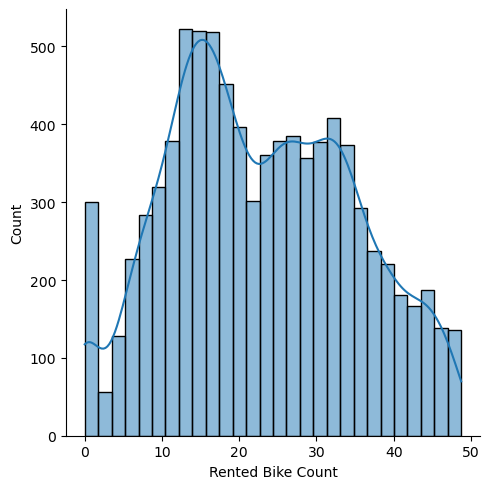

In [305]:
sns.displot(y,kde=True)
# After power transformation ,we obtain near normal distribution

In [306]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [327]:
score_df=pd.DataFrame({'Model':[],'Mean AE':[],'MSE':[],'RMSE':[],'R2 Score':[]})

def calc_scores(model,true,pred):
    
    MAE=mean_absolute_error(true,pred)
    MSE=mean_squared_error(true,pred)
    RMSE=np.sqrt(MSE)
    R2=r2_score(true,pred)
    
    
    scores={'Model':model,'Mean AE':MAE,'MSE':MSE,'RMSE':RMSE,'R2 Score':R2}
    global score_df
    score_df=score_df.append(scores,ignore_index=True)
    return score_df



In [308]:
def reg_scatter(true,pred):
    plt.figure(figsize=(10,8))
    
    sns.regplot(x=true,y=pred,scatter_kws={'color':'orange'},line_kws={'color':'black'})
    plt.legend(['Actual','Predicted'])
    plt.show()

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [309]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [310]:
# ML Model - 1 Implementation
lin_reg=LinearRegression()


# Fit the Algorithm
reg=lin_reg.fit(X_train,y_train)

# Predict on the model
lr_y_pred=reg.predict(X_test)

print('Coeff are',reg.coef_)
print("Intercept is",reg.intercept_)


Coeff are [ 5.04153763e+00  1.64784782e+00 -2.34792621e+00 -4.61297590e-01
 -5.68897931e-01  5.04086370e+00  1.82581440e+13 -1.11309144e+14
  1.73831410e+14  1.31893513e+14  2.38571606e+00  2.09730785e+00
  5.36417848e+00 -1.41996460e-01  1.56154835e+14  1.56154835e+14
  1.53777257e+14 -2.60027230e+13 -2.72189008e+13 -2.81055918e+13
  8.14305026e+13  8.33797546e+13  8.48934710e+13  3.43637996e-01]
Intercept is 22.85538439922061


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [328]:
calc_scores('Linear Regression',y_test,lr_y_pred)

,Model,Mean AE,MSE,RMSE,R2 Score
0,Linear Regression,5.111712,46.052377,6.78619,0.676015


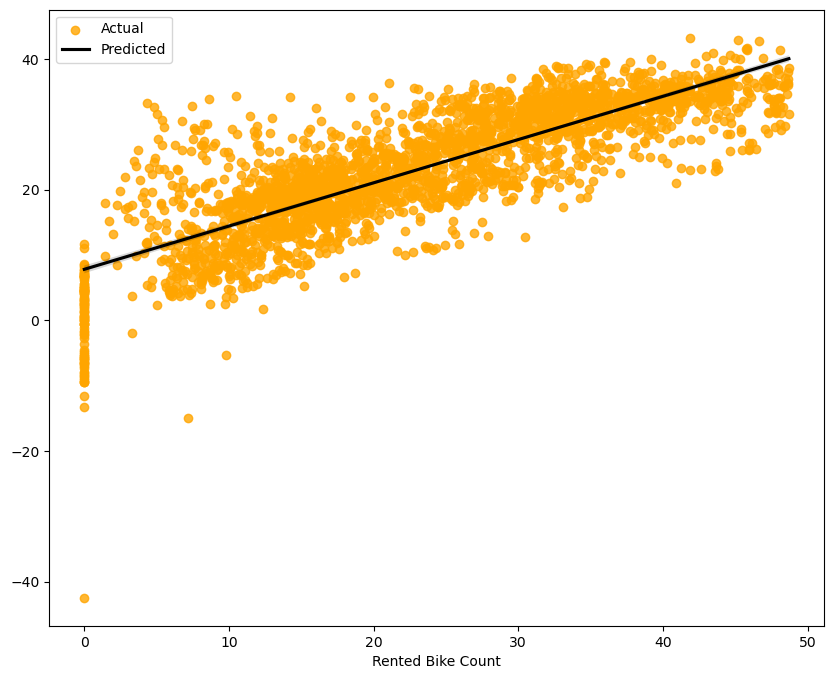

In [323]:
# Visualizing evaluation Metric Score chart
reg_scatter(y_test,lr_y_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [315]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [324]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_y_pred=rf.predict(X_test)

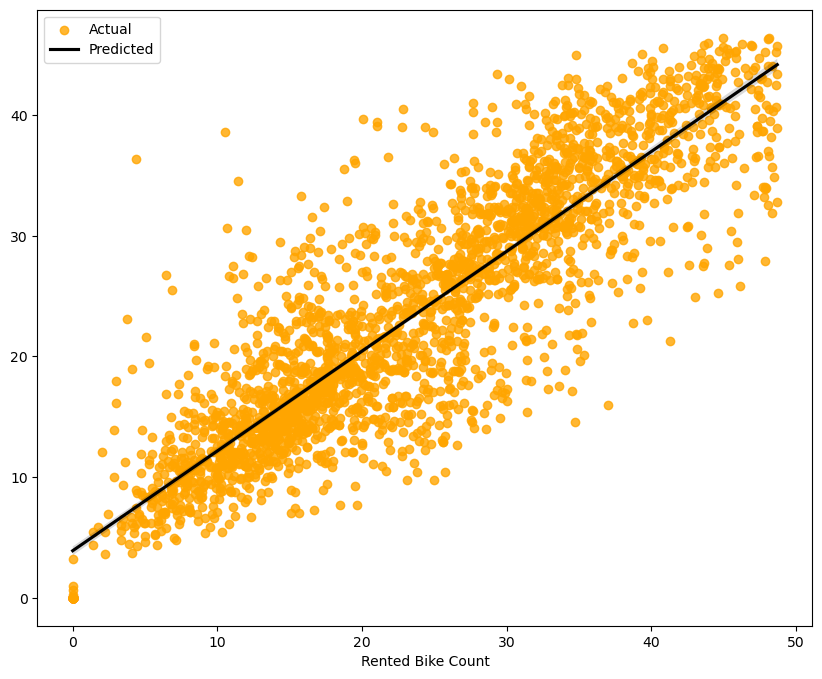

In [325]:
# Visualizing evaluation Metric Score chart
reg_scatter(y_test,rf_y_pred)

In [329]:
calc_scores('Random Forest',y_test,rf_y_pred)

,Model,Mean AE,MSE,RMSE,R2 Score
0,Linear Regression,5.111712,46.052377,6.78619,0.676015
1,Random Forest,3.869306,30.012651,5.47838,0.788857


#### 2. Cross- Validation & Hyperparameter Tuning

In [317]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [318]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [319]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [320]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [321]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [322]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***